### 데이터셋 및 데이터로더

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [ ]:
x_train  =  torch.FloatTensor([[73,  80,  75],
                               [93,  88,  93],
                               [89,  91,  90],
                               [96,  98,  100],
                               [73,  66,  70]])
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

In [ ]:
dataset = TensorDataset(x_train, y_train)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [ ]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [ ]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
  for batch_idx, samples in enumerate(dataloader):
    print(batch_idx)
    print(samples)
    x_train, y_train = samples

    prediction = model(x_train)
    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(epoch, nb_epochs, batch_idx+1, len(dataloader), cost.item()))

0
[tensor([[89., 91., 90.],
        [93., 88., 93.]]), tensor([[180.],
        [185.]])]
Epoch    0/20 Batch 1/3 Cost: 73435.828125
1
[tensor([[73., 66., 70.],
        [73., 80., 75.]]), tensor([[142.],
        [152.]])]
Epoch    0/20 Batch 2/3 Cost: 12213.071289
2
[tensor([[ 96.,  98., 100.]]), tensor([[196.]])]
Epoch    0/20 Batch 3/3 Cost: 9815.430664
0
[tensor([[ 96.,  98., 100.],
        [ 73.,  80.,  75.]]), tensor([[196.],
        [152.]])]
Epoch    1/20 Batch 1/3 Cost: 1384.428955
1
[tensor([[89., 91., 90.],
        [93., 88., 93.]]), tensor([[180.],
        [185.]])]
Epoch    1/20 Batch 2/3 Cost: 527.903992
2
[tensor([[73., 66., 70.]]), tensor([[142.]])]
Epoch    1/20 Batch 3/3 Cost: 135.915833
0
[tensor([[93., 88., 93.],
        [73., 80., 75.]]), tensor([[185.],
        [152.]])]
Epoch    2/20 Batch 1/3 Cost: 46.631306
1
[tensor([[ 73.,  66.,  70.],
        [ 96.,  98., 100.]]), tensor([[142.],
        [196.]])]
Epoch    2/20 Batch 2/3 Cost: 21.087519
2
[tensor([[89., 91., 9

In [ ]:
new_var = torch.FloatTensor([[73,80,75]])
pred_y = model(new_var)
print(pred_y)

tensor([[153.4378]], grad_fn=<AddmmBackward0>)


### 소프트맥스 회귀를 이용한 MNIST 데이터 분류 구현

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

import torchvision.datasets as dsets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import random

* 모델 코드

In [ ]:
class MNIST_SoftmaxRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(28*28, 10)
    # softmax연산 -> cross_entropy class가 해줌
  def forward(self, x):
    return self.linear(x)

* 학습 코드

In [ ]:
# hyperparameters
training_epochs = 15
batch_size = 100

# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 106992854.17it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 30957243.50it/s]


Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28553639.64it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15640828.22it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [ ]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True)

model= MNIST_SoftmaxRegression()

# 옵티마이저, 비용함수 정의
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
criterion = nn.CrossEntropyLoss() # 내부적으로 소프트맥스 함수 포함하고 있음

In [ ]:
len(data_loader)  # 미니배치의 총 개수 = 샘플 개수(60000) / 배치 사이즈(100)

600

In [ ]:
for epoch in range(training_epochs):
  avg_cost= 0
  total_batch = len(data_loader)

  for idx, (x_train, y_train) in enumerate(data_loader):
    x_train = x_train.view(-1,28*28)

    pred = model(x_train)
    cost = criterion(pred, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print('Epoch:', '%04d'%(epoch+1), 'cost=', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost= 0.535643637
Epoch: 0002 cost= 0.359140307
Epoch: 0003 cost= 0.331101537
Epoch: 0004 cost= 0.316462904
Epoch: 0005 cost= 0.307113737
Epoch: 0006 cost= 0.300343513
Epoch: 0007 cost= 0.294880271
Epoch: 0008 cost= 0.290663213
Epoch: 0009 cost= 0.287311882
Epoch: 0010 cost= 0.284379900
Epoch: 0011 cost= 0.281955898
Epoch: 0012 cost= 0.279638827
Epoch: 0013 cost= 0.277713269
Epoch: 0014 cost= 0.276085198
Epoch: 0015 cost= 0.274426669
Learning finished


* 테스트 코드

In [ ]:
with torch.no_grad():
  x_test = mnist_test.data.view(-1,28*28).float()
  y_test = mnist_test.targets

  prediction = model(x_test)
  correct_prediction = torch.argmax(prediction, 1) == y_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.8888000249862671


In [ ]:
len(mnist_test)

10000

Label:  8
Prediction:  8


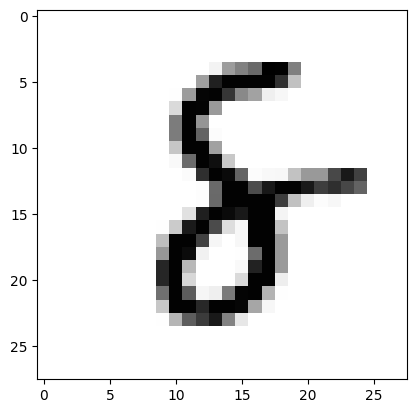

In [ ]:
with torch.no_grad():
  r = random.randint(0, len(mnist_test)-1)
  x_single_data = mnist_test.data[r:r+1].view(-1,28*28).float()
  y_single_data = mnist_test.targets[r:r+1]

  print('Label: ', y_single_data.item())
  single_prediction = model(x_single_data)
  print('Prediction: ', torch.argmax(single_prediction, 1).item())

  plt.imshow(mnist_test.data[r:r+1].view(28,28), cmap='Greys', interpolation='nearest')
  plt.show()